In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

Read the json file and return a dictionary

In [2]:
file_name = 'FE_dispatch_95_5_median_new.json'

with open(file_name) as f:
    sub_data = json.load(f)

Here are the keys of this dictionary.

In [3]:
sub_data.keys()

dict_keys(['cluster_95_dispatch', 'cluster_5_dispatch', 'median_dispatch'])

The 'cluster_95_dispatch' is the sub_scenario data for 95 quantile average capacity factor. 

The value of this key is still a dictionary

In [4]:
sub_95_data = sub_data['cluster_95_dispatch']

type(sub_95_data)

dict

In the 'sub_95_data' dictionary, the keys are the scenario number, from 0 to number of representative days -1.

Here the json will automatically set the keys in the dictionary to string instead of float.  

In [5]:
print(sub_95_data.keys())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])


Here you can have the list of lenght 24, which is the time series capacity factor data.

In [6]:
print('The type of the 0.95 quantile average capacity factor data of scenario 0 is',type(sub_95_data['0']))

print('The length of the 0.95 quantile average capacity factor data of scenario 0 is',len(sub_95_data['0']))

The type of the 0.95 quantile average capacity factor data of scenario 0 is <class 'list'>
The length of the 0.95 quantile average capacity factor data of scenario 0 is 24


In [7]:
sub_95_data['0']

[[1.2000000000000002],
 [1.2000000000000002],
 [1.2000000000000002],
 [1.2000000000000002],
 [1.2000000000000002],
 [1.2000000000000002],
 [1.2000000000000002],
 [1.2000000000000002],
 [1.0],
 [0.8172056776315789],
 [1.0],
 [1.0],
 [1.0],
 [0.6052631578947368],
 [0.21052631578947367],
 [0.0],
 [0.39473684210526316],
 [0.0],
 [0.39473684210526316],
 [0.7894736842105263],
 [1.0],
 [1.0],
 [1.0],
 [1.0]]

Separate the capacity factor into generator capacity factor and storage capacity factor

In [11]:
sep_data = {}
for i in sub_data:
    sep_data[i] = {}
    for j in sub_data[i]:
        gen = []
        sto = []
        for idx, t in enumerate(sub_data[i][j]):
            if t[0] >= 1.0001:
                # if t[0] >= 1, then the storage is dispatched and the generator is working at full capacity
                sto.append((t[0]-1)/0.2)
                gen.append(0)
            else:
                # if t[0] <= 1, then the storage is not working and the generator is working at the given capacity
                sto.append(0)
                gen.append(t[0])
        sep_data[i][j] = [gen,sto]
sep_data['cluster_95_dispatch']['1']

[[0.21052631578947367,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.39473684210526316,
  0.2876325197368422,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.39473684210526316,
  0.7894736842105263,
  0.39473684210526316,
  0.0,
  0.0,
  0.39473684210526316,
  0.7894736842105263],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Save the data to json file.

In [12]:
with open('FE_dispatch_95_5_median_separate.json', 'w') as f:
    json.dump(sep_data, f)

Create a file with only 3 day profiles

In [13]:
sep_data_3_day = {}
for key in sep_data:
    sep_data_3_day[key] = {}
    for i in range(3):
        sep_data_3_day[key][str(i)] = sep_data[key][str(i)]

with open('FE_dispatch_95_5_median_separate_3_day.json', 'w') as f:
    json.dump(sep_data_3_day, f)

sub_scenario_dispatch_profile = spe_data[keys][scenario_number]

keys in ['cluster_95_dispatch', 'cluster_5_dispatch', 'median_dispatch']

scenario_number in list(str(range(30)))

sub_scenario_dispatch_profile[0] = generator profile

sub_scenario_dispatch_profile[1] = storage profile

For the full capacity days and zero capacity days, each sub-scenario is the same.

full days:

Generator_capacity_profile_full = [1]*24

Storage_capacity_profile_full = [0]*24

zero days:

Generator_capacity_profile_full = [0]*24

Storage_capacity_profile_full = [0]*24

In [125]:
filter_opt = True

idx = 1

num_clusters = 10

if filter_opt == True and (idx == 0 or idx == num_clusters + 1):
    print('spe')
else:
    print(idx-1)

0


## Show the thermal storage is not dispatched in the DA market.

In [37]:
from Simulation_Data_FE import SimulationData
import pathlib

# For RT dispatch data

dispatch_data_path = str(pathlib.Path.cwd().joinpath('..','..','..','..','..','..','datasets','results_fossil_sweep_revised_fixed_commitment','Dispatch_data_FE_Dispatch_whole.csv'))
input_data_path = str(pathlib.Path.cwd().joinpath('..','..','..','..','..','..','datasets','results_fossil_sweep_revised_fixed_commitment','sweep_parameters_results_FE_whole.h5'))
case_type = 'FE'
num_clusters = 20
num_sims = 400
input_layer_node = 4
filter_opt = True

simulation_data_rt = SimulationData(dispatch_data_path, input_data_path, num_sims, case_type)

dispatch_dict, input_data_dict = simulation_data_rt.read_data_to_dict()

count_rt = []
for i in range(100):
    c = 0
    for j in dispatch_dict[i]:
        if j - 436 > 0.01:
            c += 1
    count_rt.append(c)

count_rt_p = []
for i in range(100):
    c = 0
    for j in dispatch_dict[i]:
        if j - 436 > 0.01:
            c += (j-436)
    count_rt_p.append(c)
count_rt_p

[2912.9103859999996,
 3073.76091,
 3118.578882999999,
 3020.2339420000003,
 2953.000028,
 3116.3118599999993,
 3091.826139,
 3150.980626,
 3083.551894,
 3086.8919039999996,
 6636.485657999998,
 6636.262112999998,
 6799.537124999999,
 6865.900309999999,
 6842.002650999998,
 7034.384647999999,
 6865.8432649999995,
 6919.436919999999,
 6872.377219,
 6794.7522709999985,
 11466.984371999997,
 11505.420988,
 11178.254454,
 10854.458317000004,
 11850.600349000004,
 10805.262876999997,
 11047.159983999998,
 11008.004306999997,
 10988.365701000004,
 10821.842244000001,
 15504.488236,
 16106.681942,
 16117.237469000002,
 15797.847690000002,
 15525.909461999996,
 16543.485186999995,
 16057.165389999996,
 15698.005043,
 14711.613127999997,
 15875.030107000002,
 19937.339921999996,
 20296.241640000004,
 19661.74890900001,
 20059.636059999993,
 20518.155701,
 20631.285667999993,
 19396.567873999993,
 20928.259763,
 19125.294717999997,
 20606.46573300001,
 25124.903306999997,
 25158.310909000007,
 23

In [38]:
# For DA dispatch data

dispatch_data_path = str(pathlib.Path.cwd().joinpath('..','..','..','..','..','..','datasets','results_fossil_sweep_revised_fixed_commitment','Dispatch_data_FE_Dispatch DA_whole.csv'))
input_data_path = str(pathlib.Path.cwd().joinpath('..','..','..','..','..','..','datasets','results_fossil_sweep_revised_fixed_commitment','sweep_parameters_results_FE_whole.h5'))
case_type = 'FE'
num_clusters = 20
num_sims = 400
input_layer_node = 4
filter_opt = True

simulation_data_DA = SimulationData(dispatch_data_path, input_data_path, num_sims, case_type)

dispatch_dict, input_data_dict = simulation_data_DA.read_data_to_dict()

count_da = []
for i in range(100):
    c = 0
    for j in dispatch_dict[i]:
        if j - 436 > 0.01:
            c += 1
    count_da.append(c)
    
count_da_p = []
for i in range(100):
    c = 0
    for j in dispatch_dict[i]:
        if j - 436 > 0.01:
            c += (j-436)
    count_da_p.append(c)
count_da_p

[0,
 0.2524680000000217,
 0,
 0,
 0,
 25.010910000000024,
 0,
 0,
 0,
 0,
 7.174215000000004,
 30.0,
 7.174215000000004,
 0,
 0,
 7.174215000000004,
 0,
 0,
 0,
 0,
 7.174215000000004,
 0,
 38.785214999999994,
 7.174215000000004,
 0,
 7.174215000000004,
 0,
 0,
 0,
 0,
 42.16085599999997,
 30.36159299999997,
 21.50770799999998,
 29.694133999999963,
 21.50770799999998,
 39.487968999999964,
 0,
 14.677478000000008,
 0,
 0,
 156.8338559999999,
 25.31881500000003,
 29.535194000000047,
 32.631800999999996,
 69.52506900000009,
 22.77788000000004,
 29.17446700000005,
 10.302693999999974,
 22.904946999999993,
 18.790063999999973,
 788.0107820000005,
 686.5658140000003,
 777.3245539999998,
 787.6531469999998,
 600.8517959999999,
 621.024148,
 576.5042180000002,
 651.1760829999998,
 644.0733300000002,
 604.2706840000001,
 4535.609840000005,
 4325.856045000002,
 4090.265986000004,
 4487.166513000002,
 4257.634937000002,
 3841.708814000004,
 3847.251407,
 3637.829243999998,
 3291.729654000001,
 34

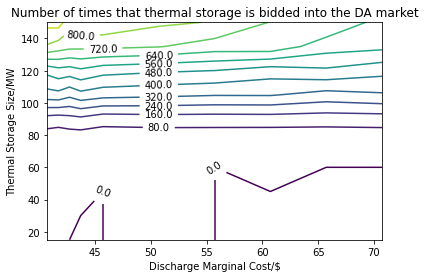

In [47]:
dis_cost = np.array([40.71699147,41.71699147,42.71699147,43.71699147,45.71699147,50.71699147,55.71699147,60.71699147,65.71699147,70.71699147])
stor_size = np.array([15,30,45,60,75,90,105,120,135,150])
X,Y = np.meshgrid(dis_cost,stor_size)
dispatch_rt_contour = np.zeros((len(dis_cost),len(stor_size)))
c = 0
for p in range(len(stor_size)):
    for h in range(len(dis_cost)):
        dispatch_rt_contour[p,h] = count_da[c]
        c += 1
# np.shape(rev_contour)
contour = plt.contour(X,Y,dispatch_rt_contour,12)
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=10)
# plt.scatter(X,Y)
plt.xlabel('Discharge Marginal Cost/$')
plt.ylabel('Thermal Storage Size/MW')
plt.title('Number of times that thermal storage is bidded into the DA market')
plt.savefig('Times_thermal_dispatch_DA.jpg',dpi = 300)

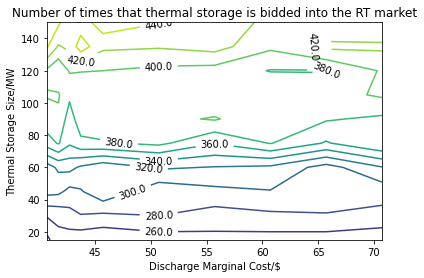

In [48]:
dis_cost = np.array([40.71699147,41.71699147,42.71699147,43.71699147,45.71699147,50.71699147,55.71699147,60.71699147,65.71699147,70.71699147])
stor_size = np.array([15,30,45,60,75,90,105,120,135,150])
X,Y = np.meshgrid(dis_cost,stor_size)
dispatch_rt_contour = np.zeros((len(dis_cost),len(stor_size)))
c = 0
for p in range(len(stor_size)):
    for h in range(len(dis_cost)):
        dispatch_rt_contour[p,h] = count_rt[c]
        c += 1
# np.shape(rev_contour)
contour = plt.contour(X,Y,dispatch_rt_contour,12)
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=10)
# plt.scatter(X,Y)
plt.xlabel('Discharge Marginal Cost/$')
plt.ylabel('Thermal Storage Size/MW')
plt.title('Number of times that thermal storage is bidded into the RT market')
plt.savefig('Times_thermal_dispatch_RT.jpg',dpi = 300)

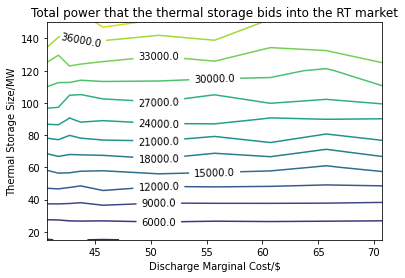

In [49]:
dis_cost = np.array([40.71699147,41.71699147,42.71699147,43.71699147,45.71699147,50.71699147,55.71699147,60.71699147,65.71699147,70.71699147])
stor_size = np.array([15,30,45,60,75,90,105,120,135,150])
X,Y = np.meshgrid(dis_cost,stor_size)
dispatch_rt_p_contour = np.zeros((len(dis_cost),len(stor_size)))
c = 0
for p in range(len(stor_size)):
    for h in range(len(dis_cost)):
        dispatch_rt_p_contour[p,h] = count_rt_p[c]
        c += 1
# np.shape(rev_contour)
contour = plt.contour(X,Y,dispatch_rt_p_contour,12)
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=10)
# plt.scatter(X,Y)
plt.xlabel('Discharge Marginal Cost/$')
plt.ylabel('Thermal Storage Size/MW')
plt.title('Total power that the thermal storage bids into the RT market')
plt.savefig('Power_thermal_dispatch_RT.jpg',dpi = 300)

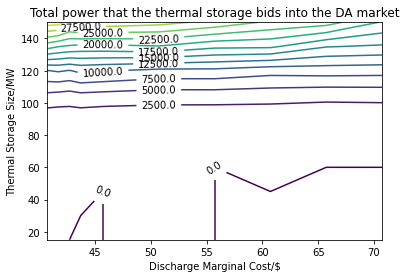

In [50]:
dis_cost = np.array([40.71699147,41.71699147,42.71699147,43.71699147,45.71699147,50.71699147,55.71699147,60.71699147,65.71699147,70.71699147])
stor_size = np.array([15,30,45,60,75,90,105,120,135,150])
X,Y = np.meshgrid(dis_cost,stor_size)
dispatch_da_p_contour = np.zeros((len(dis_cost),len(stor_size)))
c = 0
for p in range(len(stor_size)):
    for h in range(len(dis_cost)):
        dispatch_da_p_contour[p,h] = count_da_p[c]
        c += 1
# np.shape(rev_contour)
contour = plt.contour(X,Y,dispatch_da_p_contour,12)
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=10)
# plt.scatter(X,Y)
plt.xlabel('Discharge Marginal Cost/$')
plt.ylabel('Thermal Storage Size/MW')
plt.title('Total power that the thermal storage bids into the DA market')
plt.savefig('Power_thermal_dispatch_DA.jpg',dpi = 300)